Datatrained
Evaluation Project - 3
Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('avacado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.drop(data.columns[0],axis=1,inplace=True)

In [4]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data=data.dropna()
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


# Visualization

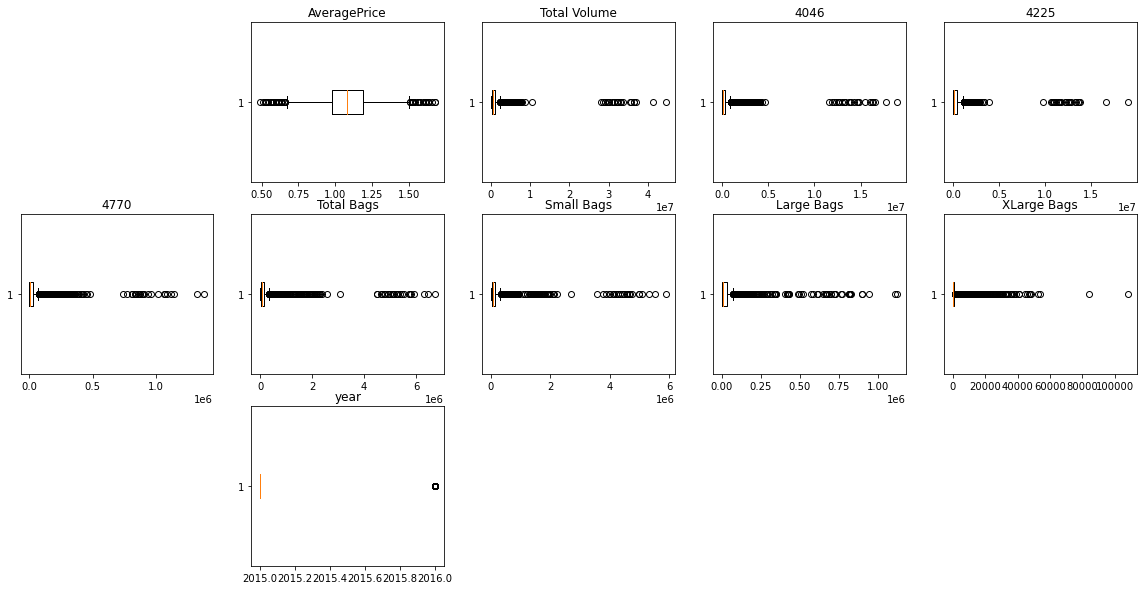

In [7]:
plt.figure(figsize=(20,10))

for i in range(len(data.columns)):
    if data.dtypes[i] !='object':
        plt.subplot(3,5,i+1)
        plt.boxplot(data[data.columns[i]],vert=False)
        plt.title(data.columns[i])
        
plt.show()

In [8]:
data.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Encoding:

In [9]:
def get_uniques(df,columns):
    return {column:list(df[column].unique()) for column in columns}

In [10]:
categorical_columns=['region','Date','type']

get_uniques(data,categorical_columns)

{'region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico'],
 'Date': ['27-12-2015',
  '20-12-2015',
  '13-12-2015',
  '06-12-2015',
  '29-11-2015',
  '22-11-2015',
  '15-11-2015',
  '08-11-2015',
  '01-11-2015',
  '25-10-2015',
 

In [11]:
ordinal_features=['Date']
nominal_features=['region']
target_column='type'

In [12]:
date_ordering=sorted(data['Date'].unique())

In [13]:
def ordinal_encode(df,column,ordering):
    df=df.copy()
    df[column]=df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df,dummies],axis=1)
    df.drop(column,axis=1,inplace=True)
    return df

In [14]:
data=ordinal_encode(data,'Date', date_ordering)

In [15]:
data=onehot_encode(data,'region')


In [16]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,92,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,...,0,0,0,0,0,0,0,0,0,0
1,68,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,...,0,0,0,0,0,0,0,0,0,0
2,44,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,...,0,0,0,0,0,0,0,0,0,0
3,20,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,...,0,0,0,0,0,0,0,0,0,0
4,98,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,53,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,...,0,0,0,0,0,0,0,0,0,0
1513,29,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,...,0,0,0,0,0,0,0,0,0,0
1514,5,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,...,0,0,0,0,0,0,0,0,0,0
1515,83,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,...,0,0,0,0,0,0,0,0,0,0


In [17]:
label_encoder=LabelEncoder()
data[target_column]=label_encoder.fit_transform(data[target_column])

# Splitting and Scaling

In [18]:
y=data[target_column]
x=data.drop(target_column,axis=1)

In [19]:
scaler=StandardScaler()

x=scaler.fit_transform(x)

In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1512    0
1513    0
1514    0
1515    0
1516    0
Name: type, Length: 1517, dtype: int32

In [21]:
x

array([[ 1.37776563,  1.35048079, -0.34696593, ..., -0.12944509,
        -0.15590991, -0.13461354],
       [ 0.57857991,  1.45639674, -0.34907791, ..., -0.12944509,
        -0.15590991, -0.13461354],
       [-0.22060582, -0.76783831, -0.33478463, ..., -0.12944509,
        -0.15590991, -0.13461354],
       ...,
       [-1.51928262,  2.14485045, -0.32120275, ..., -0.12944509,
        -0.15590991, -0.13461354],
       [ 1.07807099,  2.09189247, -0.31878364, ..., -0.12944509,
        -0.15590991, -0.13461354],
       [ 0.27888526,  1.88006056, -0.3201721 , ..., -0.12944509,
        -0.15590991, -0.13461354]])

In [22]:
y.shape

(1517,)

In [23]:
x.shape

(1517, 62)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3,random_state=2)

# Training

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(455, 62)
(455,)
(1062, 62)
(1062,)


In [26]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression().fit(x_train,y_train)

In [27]:
linreg.score(x_test,y_test)

1.0

In [28]:
linreg.score(x_train,y_train)

1.0

In [29]:
print(linreg.intercept_)
print(linreg.coef_)

0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [30]:
y_predict=linreg.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [31]:
from sklearn import metrics
import numpy as np

In [32]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

0.0


In [33]:
import matplotlib.pyplot as plt

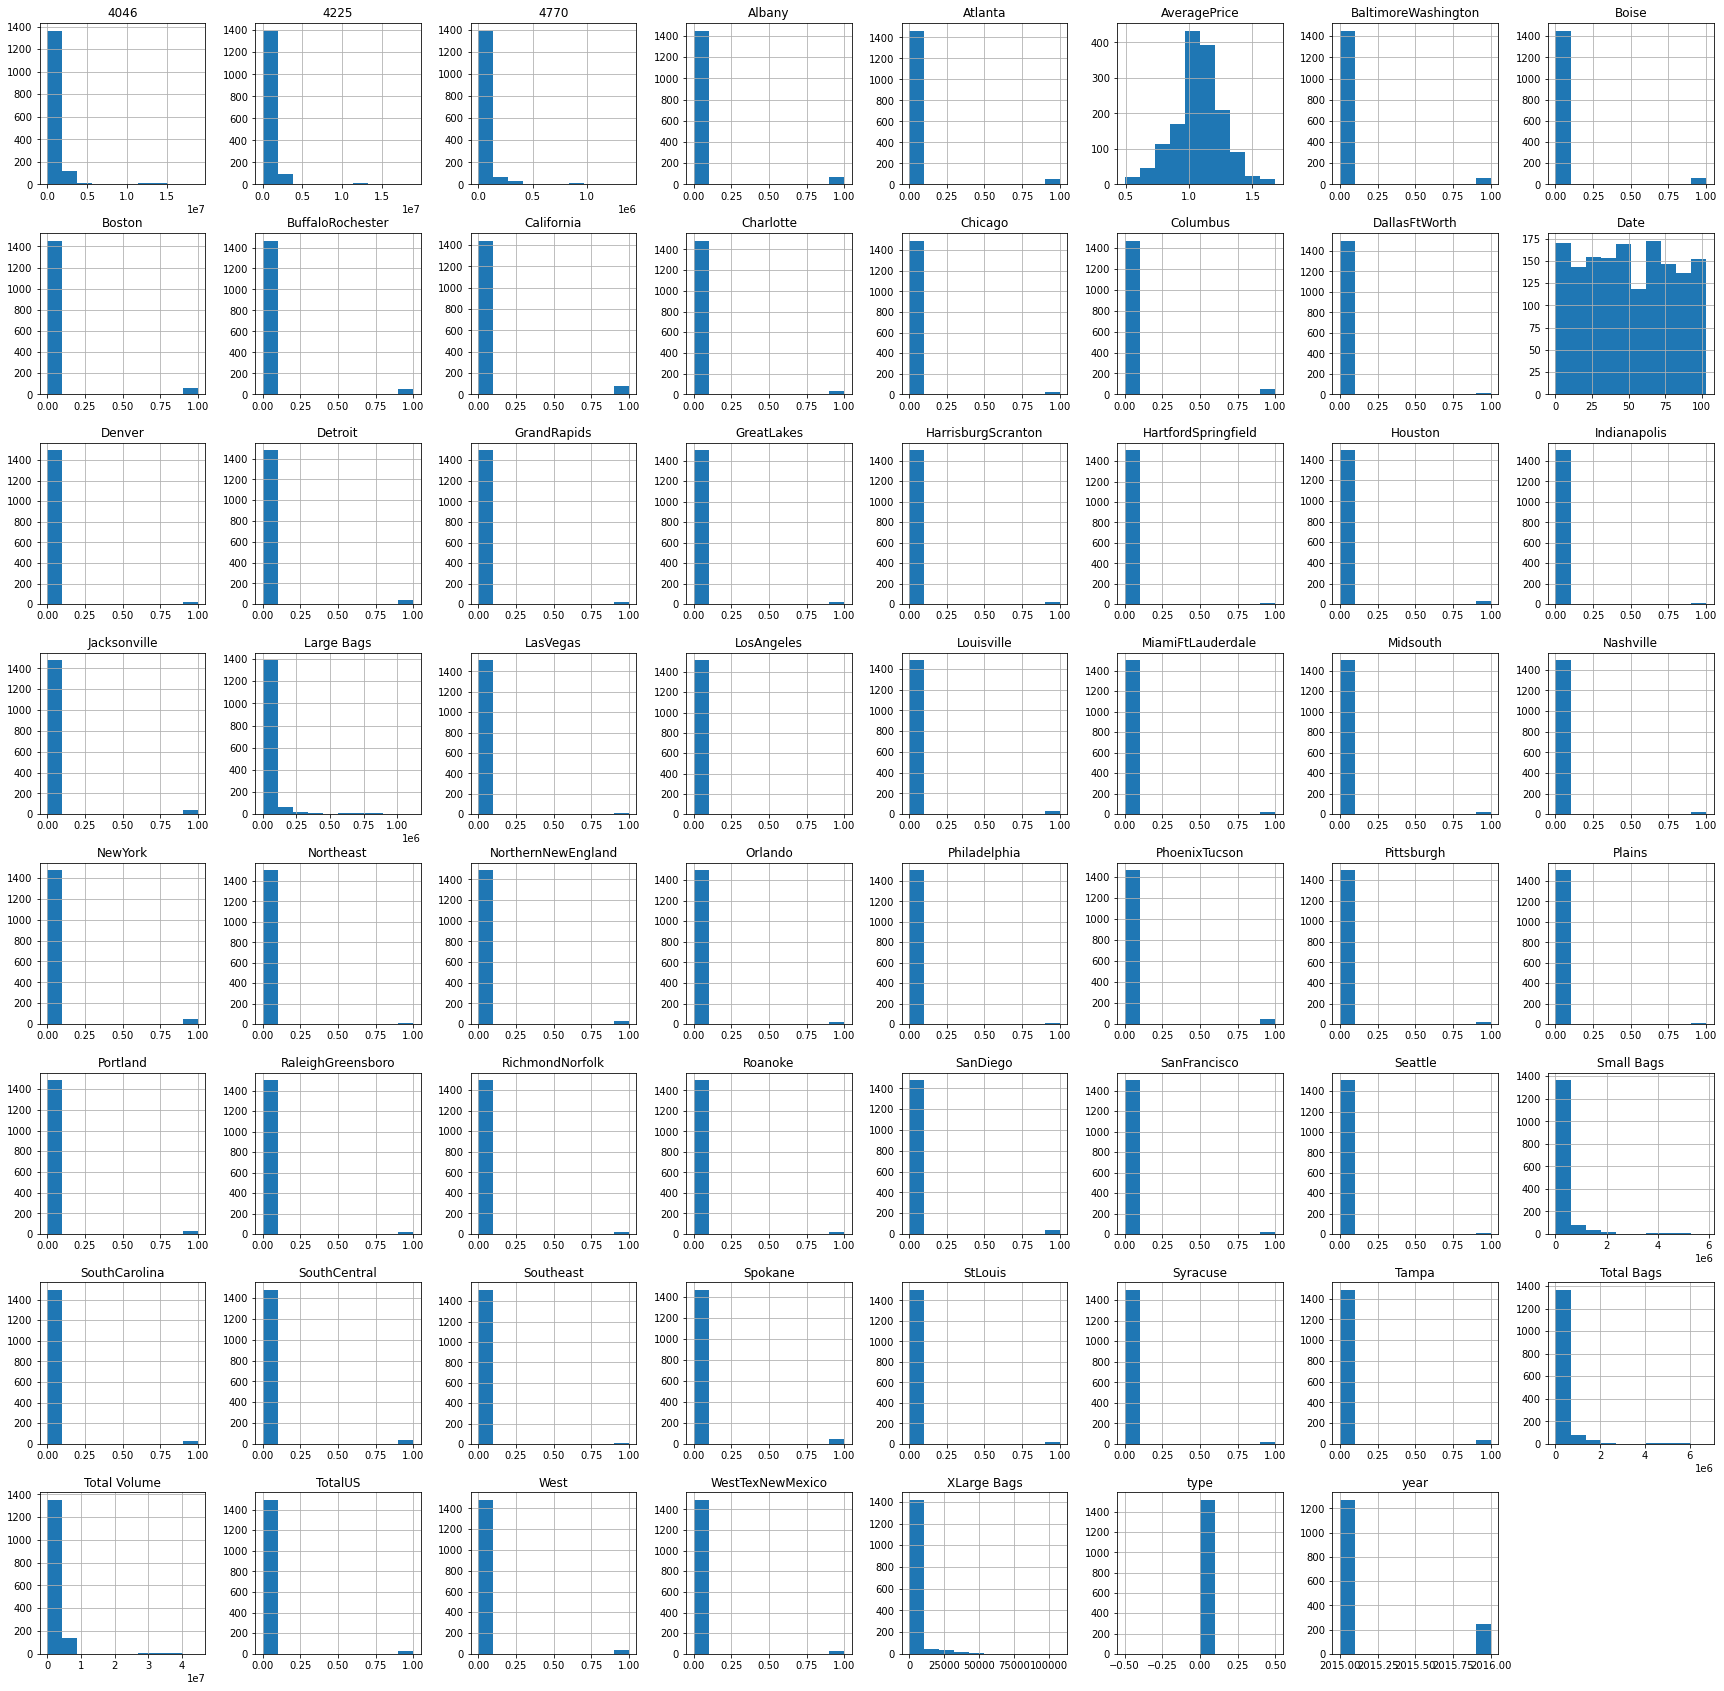

In [34]:
data.hist(figsize=(30,30))
plt.show()

In [35]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [36]:
lasso_reg.score(x_test,y_test)

1.0

In [37]:
lasso_reg.score(x_train,y_train)

1.0

# model saving:

In [38]:
import pickle
filename = 'avacado.pkl'
pickle.dump(data,open(filename,'wb'))

# Conclusion:

In [41]:
import numpy as np
a=np.array(y_test)
predicted=np.array(linreg.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
1057,0,0.0
1058,0,0.0
1059,0,0.0
1060,0,0.0
